In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import ListedColormap
from matplotlib.lines import Line2D
from sklearn.manifold import TSNE

plt.rc("font", family="Times New Roman")
plt.rcParams["hatch.color"] = "white"
plt.rcParams["font.size"] = 13
ROOT_PATH = "/home/ay/data/DATA/1-model_save/00-Deepfake/1-df-audio"

In [2]:
from utils import read_test_result

In [131]:
models = [
    "Ours/ResNet",
            "Ours/ablations/con_loss_feat/ResNet",
        "Ours/ablations/con_loss_voc/ResNet",
        "Ours/ablations/con_loss_feat_voc/ResNet",
]
labels = ['Ours', 'w/o $\mathcal{L}_{con\_s}$', 'w/o $\mathcal{L}_{con\_{cls}}$', 'w/o $\mathcal{L}_{con\_s}$ & $\mathcal{L}_{con\_{cls}}$']
# labels = ['Ours', 'w/o $\mathcal{L}_1$', 'w/o $\mathcal{L}_2$', 'w/o $\mathcal{L}_1$ & $\mathcal{L}_2$']

DATA = []
tasks = ["LibriSeVoc_cross_method", "LibriSeVoc_cross_dataset"]
version = 0
for model in models:
    for task in tasks:
        _data = read_test_result(model, task, version, metric_prefix="test")
        res = _data.dropna().reset_index(drop=True)

        if task == "LibriSeVoc_cross_method":
            res.loc['Avg', :] = res.mean()
            res = res.reset_index(drop=True)
            res = res.iloc[-1:]
        elif task == "LibriSeVoc_cross_dataset":
            res = res.iloc[:7]
            res.loc['Avg', :] = res.mean()
            res = res.reset_index(drop=True)
            res = res.iloc[-1:]
        res["model"] = model
        res["task"] = task
        DATA.append(res)
data = pd.concat(DATA).reset_index(drop=True)

In [129]:
data1 = data[data["task"] == "LibriSeVoc_cross_method"]
data2 = data[data["task"] == "LibriSeVoc_cross_dataset"]

In [125]:
EER_metrics = {
    "eer1": [1 - x for x in data1["test-eer"]],
    "eer2": [1 - x for x in data2["test-eer"]],
}
AUC_metrics = {"auc_en": data1["test-auc"], "auc_ch": data2["test-auc"]}

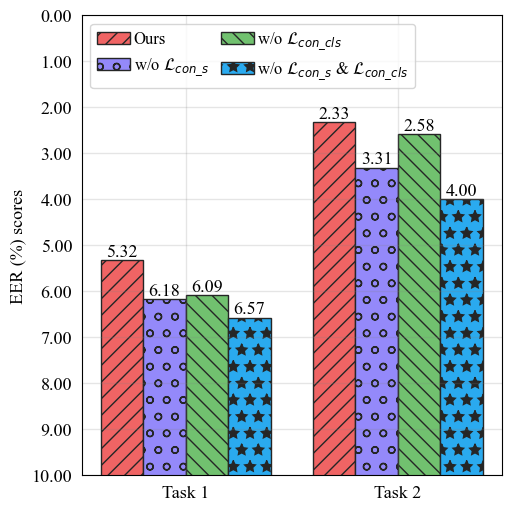

In [132]:
width = 0.5  # the width of the bars
# colors = ["red", "white", 'yellow', '#008000']
colors = ["#3b6291", "#943c39", "#779043", "#624c7c"]
colors = ["#f06464", "#9489fa", "#71c16f", "#2aaaef"]


hatches = ["//", "o", "\\\\", "*"]
fig, ax = plt.subplots(layout="constrained", figsize=(5, 5))

for i in range(4):
    x_ticks = [i * width, i * width + 0.5 + 4 * width]
    values = [EER_metrics["eer1"][i], EER_metrics["eer2"][i]]
    rects = ax.bar(
        x_ticks,
        values,
        width,
        label = labels[i],
        color=colors[i],
        hatch=hatches[i],
        edgecolor="#252626",
    )
    ax.bar_label(rects, labels=["%.2f"%(x * 100) for x in [1 - values[0], 1 - values[1]]])
# ax.margins(y=0.05, tight=True)
ax.set_xticks([width * 1.5, width * 6.5])
ax.set_xticklabels(["Task 1", "Task 2"])
ax.legend(labels, ncol=2, loc='upper left', fontsize=12,columnspacing=0.7,handletextpad=0.2)
# LegendVertical(ax, 90, XPad=-55, YPad=12, ncol=1, loc='right')
ax.set_ylabel("EER (%) scores")
ax.set_ylim(0.9, 1)
yticks = [x/ 100 for x in range(90, 101)]
ax.set_yticks(yticks)
ax.set_yticklabels(["%.2f"%(100 - x*100) for x in yticks])

ax.xaxis.set_ticks_position("none")
ax.yaxis.set_ticks_position("none")


# Add x, y gridlines
ax.grid(color="grey", linestyle="-", linewidth=1.0, alpha=0.2)
plt.savefig("pngs/hist_contrastive_loss.pdf", dpi=500, bbox_inches="tight")

plt.show()

In [133]:
!pdfcrop pngs/hist_contrastive_loss.pdf pngs/hist_contrastive_loss.pdf

PDFCROP 1.40, 2020/06/06 - Copyright (c) 2002-2020 by Heiko Oberdiek, Oberdiek Package Support Group.
==> 1 page written on `pngs/hist_contrastive_loss.pdf'.
